In [223]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns
import numpy as np
# import the necessary packages

In [224]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

data = pd.concat([train, test]).reset_index(drop=True)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [225]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [226]:
data[data['Alley'].notnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
21,22,45,RM,57.0,7449,Pave,Grvl,Reg,Bnk,AllPub,...,0,NaN,GdPrv,NaN,0,6,2007,WD,Normal,139400.0
30,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000.0
56,57,160,FV,24.0,2645,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Abnorml,172500.0
79,80,50,RM,60.0,10440,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,110000.0
87,88,160,FV,40.0,3951,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,New,Partial,164500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2790,2791,20,RM,65.0,9750,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,Gar2,4500,7,2006,WD,Normal,NaN
2795,2796,30,RL,50.0,11672,Pave,Pave,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,NaN
2797,2798,50,RM,60.0,10320,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,Abnorml,NaN
2870,2871,50,RL,45.0,8248,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,COD,Abnorml,NaN


<Axes: xlabel='SalePrice', ylabel='Alley'>

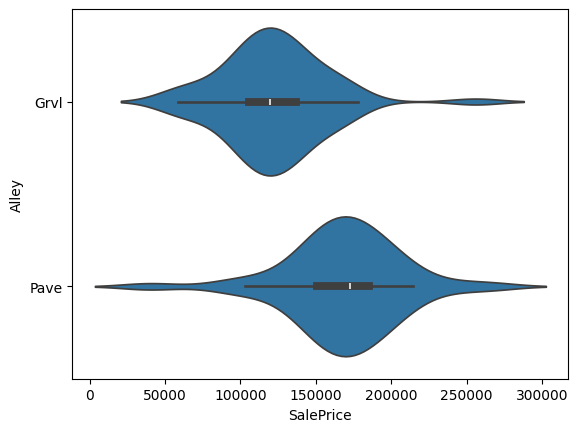

In [227]:
sns.violinplot(data, x="SalePrice", y="Alley")

<Axes: xlabel='SalePrice', ylabel='Street'>

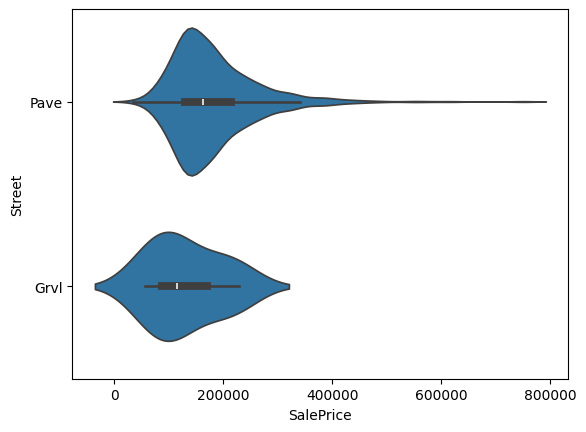

In [228]:
sns.violinplot(data, x="SalePrice", y="Street")

In [229]:
data_corr = pd.DataFrame(train)
le = LabelEncoder()

for col in data_corr.select_dtypes(include='object').columns:
    data_corr[col] = le.fit_transform(data_corr[col])

In [230]:
f, ax = plt.subplots(figsize=(100, 100))

corr = data_corr.corr().abs()
matrix_mask = np.triu(np.ones_like(corr)) # only show the upper triangular for the correlation matrix
sns.heatmap(corr, linewidths=.5, mask=matrix_mask)

<Axes: >

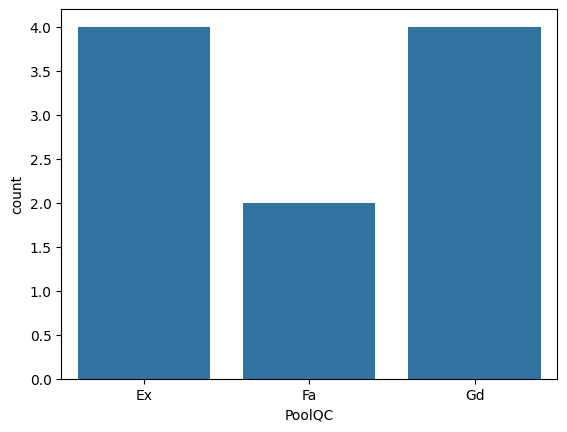

In [231]:
sns.countplot(data, x='PoolQC') # few pools in total
data = data.drop(['PoolArea', 'PoolQC'], axis=1) # drop the pool features

In [232]:
data['MSZoning'] = data.groupby(by=["Neighborhood"])['MSZoning'].apply(lambda x: x.fillna(x.mode())).reset_index(drop=True)

In [233]:
data['Utilities'] = data['Utilities'].fillna(data['Utilities'].mode())

<Axes: xlabel='MasVnrArea', ylabel='Count'>

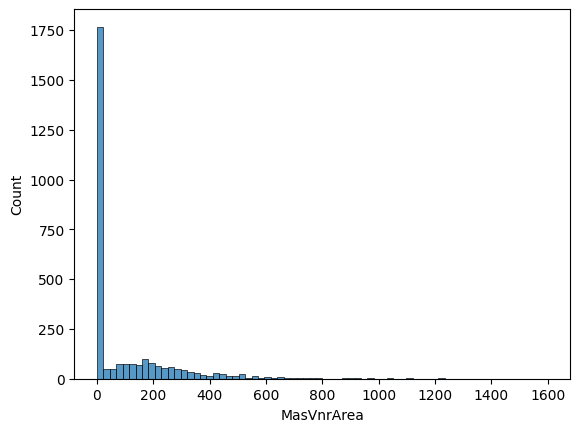

In [234]:
sns.histplot(data, x="MasVnrArea")

In [235]:
data['MasVnrArea'] = data.groupby(by=["ExterQual"])['MasVnrArea'].apply(lambda x: x.fillna(x.median())).reset_index(drop=True)

In [236]:
data['BsmtQual'] = data.groupby(by=["GarageQual", "KitchenQual"])['BsmtQual'].apply(lambda x: x.fillna(x.mode())).reset_index(drop=True)

In [ ]:
data['BsmtFinSF1'] = data.groupby(by=["BsmtFinType1"])['BsmtFinSF1'].apply(lambda x: x.fillna(x.mode())).reset_index(drop=True)